In [1]:
using DataFrames
using SolverBenchmark
using SolverTools
using JLD2

In [2]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\mehrotra"
gurobi_path = "C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\gurobi"

"C:\\Users\\Geoffroy Leconte\\Documents\\cours\\TFE\\code\\results\\gurobi"

In [15]:
file_gurobi = jldopen(string(gurobi_path, "\\gurobi_barrier_allOFF.jld2"), "r")
gurobi = file_gurobi["stats"]
close(file_gurobi)
file_gurobi2 = jldopen(string(gurobi_path, "\\gurobi_barrier_scalingON.jld2"), "r")
gurobi2 = file_gurobi2["stats"] # scaling ON
close(file_gurobi2)

file3 = jldopen(string(res_path, "\\mehrotra_ldl3_scaling.jld2"), "r") # check frontier 0.05
mehrotra3 = file3["stats"];
close(file3)
file4 = jldopen(string(res_path, "\\mehrotra_ldl4_scaling.jld2"), "r") # check frontier 0.05, new scaling
mehrotra4 = file4["stats"];
close(file3)
file5 = jldopen(string(res_path, "\\mehrotra_ldl5_scaling.jld2"), "r") # check frontier disabled
mehrotra5 = file5["stats"];
close(file5)
file6 = jldopen(string(res_path, "\\mehrotra_ldl6_scaling.jld2"), "r") 
mehrotra6 = file6["stats"];# check frontier 0.001
close(file6)
file7 = jldopen(string(res_path, "\\mehrotra_ldl7_scaling.jld2"), "r") 
mehrotra7 = file7["stats"]; # checkfr 0.001, init pts 9e-5, ρ0, δ0 = 1e7*sqrt(eps()), 1e-1
close(file7)
file8 = jldopen(string(res_path, "\\mehrotra_ldl8_scaling.jld2"), "r") 
mehrotra8 = file8["stats"]; # checkfr 0.001, init pts 9e-5, ρ0, δ0 = 1e5*sqrt(eps()), 1e-2
close(file8)
file9 = jldopen(string(res_path, "\\mehrotra_ldl9_scaling.jld2"), "r") 
mehrotra9 = file9["stats"]; #checkfr 1e-3, init pts 9e-5, δ0 fixe 5.0e-7
close(file9)
file10 = jldopen(string(res_path, "\\mehrotra_ldl10_scaling.jld2"), "r") 
mehrotra10 = file10["stats"]; #checkfr 1e-3, init pts 9e-5, δ0=5.0e-2 => 5.0e-7 (/=10)
close(file10)
#no scaling ρ, δ = 1e5*sqrt(eps()), 1e4*sqrt(eps()), no ch_fr, δ/=13 => 100*sqrt(eps()), ρ/=10 => sqrt(eps())
file11 = jldopen(string(res_path, "\\mehrotra_ldl11.jld2"), "r") 
mehrotra11 = file11["stats"]; 
close(file11)
#same 11 with scaling and δ/=11 => 100*sqrt(eps()), and 0.9999
file12 = jldopen(string(res_path, "\\mehrotra_ldl12_scaling.jld2"), "r") 
mehrotra12 = file12["stats"]; 
close(file12)
# scaling ruiz (1000 iter max, eps=1e-3) ρ, δ = 1e5*sqrt(eps()), 1e6*sqrt(eps())  /=10 => sqrt(eps), 100* sqrt(eps)
file13 = jldopen(string(res_path, "\\mehrotra_ldl13_scaling_ruiz.jld2"), "r") 
mehrotra13 = file13["stats"]; 
close(file13)

In [16]:
withenv("COLUMNS" => 600, "LINES" => 200) do
    display(mehrotra13)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,25FV47,1571,821,0,acceptable,5501.85,0.465716,24,2.12006e-11,2.79924e-12,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
2,2,ADLITTLE,97,56,0,acceptable,225495.0,0.00267005,13,8.07161e-10,8.47234e-9,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
3,3,AFIRO,32,27,0,acceptable,-464.753,0.00134706,8,5.73541e-13,9.0967e-12,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
4,4,AGG,163,488,0,acceptable,-3.59918e7,0.0284841,21,7.40081e-9,1.14694e-7,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
5,5,AGG2,302,516,0,acceptable,-2.02393e7,0.066431,19,6.43878e-9,1.11059e-9,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
6,6,AGG3,302,516,0,acceptable,1.03121e7,0.0622032,18,2.86899e-10,6.8733e-10,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
7,7,BANDM,472,305,0,acceptable,-158.628,0.379775,18,1.08889e-13,1.10534e-12,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
8,8,BEACONFD,262,173,0,acceptable,33592.5,0.012506,13,1.49173e-10,2.4088e-9,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,
9,9,BLEND,83,74,0,acceptable,-30.8121,0.00255108,10,8.82256e-12,1.87599e-11,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,


In [11]:
withenv("COLUMNS" => 600, "LINES" => 200) do
    display(gurobi)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual,extrainfo
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,1,25FV47,1571,821,0,acceptable,5501.85,0.105358,23,3.60036e-14,1.52365e-9,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
2,2,ADLITTLE,97,56,0,acceptable,225495.0,0.00198984,11,6.14448e-12,5.18785e-11,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
3,3,AFIRO,32,27,0,acceptable,-464.753,0.000803947,6,1.10707e-15,6.12274e-12,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
4,4,AGG,163,488,0,acceptable,-3.59918e7,0.049546,34,3.49367e-12,3.65782e-9,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
5,5,AGG2,302,516,0,acceptable,-2.02393e7,0.0394671,18,1.94943e-12,5.19351e-10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
6,6,AGG3,302,516,0,acceptable,1.03121e7,0.0377572,17,4.11483e-12,7.18144e-10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
7,7,BANDM,472,305,0,acceptable,-158.628,0.012805,14,4.37841e-14,1.71025e-8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
8,8,BEACONFD,262,173,0,acceptable,33592.5,0.00696611,8,1.11648e-13,3.48418e-9,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,
9,9,BLEND,83,74,0,acceptable,-30.8121,0.00203109,8,5.63118e-15,7.14603e-12,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,


In [17]:
stats = Dict(:gurobi => gurobi, :gurobi2 => gurobi2,
            :mehrotra3 => mehrotra3,
            :mehrotra11 => mehrotra11,
            :mehrotra9 => mehrotra9,  :mehrotra13=>mehrotra13)

stats2 = Dict(:mehrotra11 => mehrotra11, :mehrotra9=>mehrotra9, :mehrotra12=>mehrotra10, :mehrotra13=>mehrotra13)

Dict{Symbol,DataFrame} with 4 entries:
  :mehrotra11 => 87×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra13 => 87×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra9  => 87×30 DataFrame. Omitted printing of 23 columns…
  :mehrotra12 => 87×30 DataFrame. Omitted printing of 23 columns…

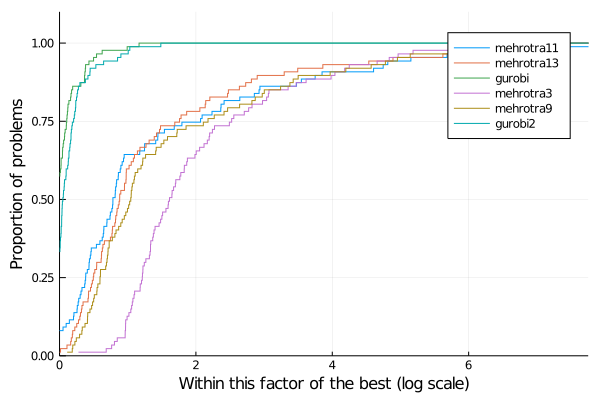

In [18]:
performance_profile(stats, df->df.elapsed_time)


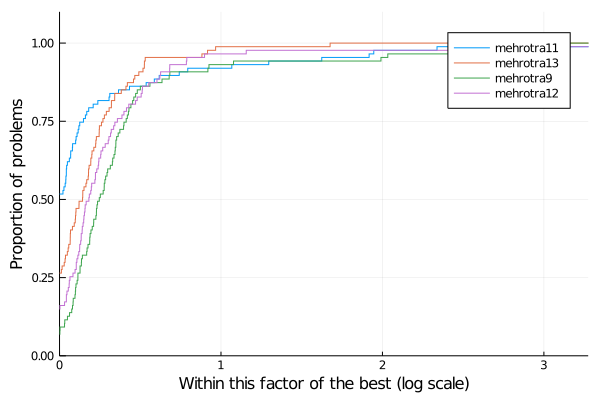

In [19]:
performance_profile(stats2, df->df.elapsed_time)